In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt

In [11]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display data info
print("Train Data Info:")
print(train.info())
print("\nTest Data Info:")
print(test.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13 

In [12]:
# Convert date to datetime and extract useful features
def process_dates(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_weekend'] = df['date'].dt.dayofweek >= 5
    return df.drop('date', axis=1)

In [13]:
# Handle categorical columns properly
def encode_categorical(df, columns):
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
    return df

In [14]:

categorical_cols = ['cluster_id']  # Add other categorical columns if present
train = encode_categorical(train, categorical_cols)
test = encode_categorical(test, categorical_cols)


In [15]:
# Ensure all columns are numeric
print("\nTrain Data Types After Processing:")
print(train.dtypes)



Train Data Types After Processing:
ID                              object
date                            object
cluster_id                       int32
electricity_consumption        float64
temperature_2m_max             float64
temperature_2m_min             float64
apparent_temperature_max       float64
apparent_temperature_min       float64
sunshine_duration              float64
daylight_duration              float64
wind_speed_10m_max             float64
wind_gusts_10m_max             float64
wind_direction_10m_dominant    float64
shortwave_radiation_sum        float64
et0_fao_evapotranspiration     float64
dtype: object


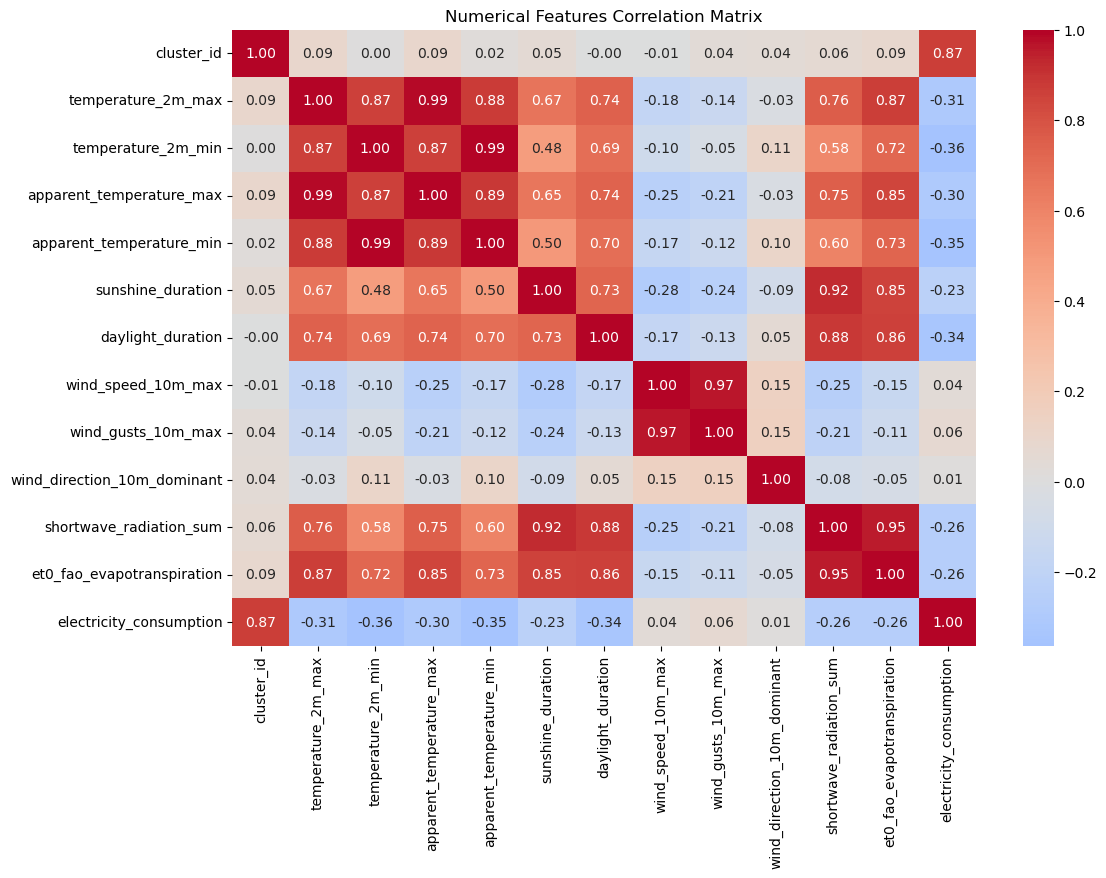

In [16]:
# Select only numerical columns for correlation
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('electricity_consumption')  # Remove target variable

corr_matrix = train[numerical_cols + ['electricity_consumption']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Numerical Features Correlation Matrix")
plt.show()


In [17]:
# Prepare features and target
X = train.drop('electricity_consumption', axis=1)
y = train['electricity_consumption']


In [18]:

# Verify all columns are numeric
print("\nFinal Feature Matrix Data Types:")
print(X.dtypes)



Final Feature Matrix Data Types:
ID                              object
date                            object
cluster_id                       int32
temperature_2m_max             float64
temperature_2m_min             float64
apparent_temperature_max       float64
apparent_temperature_min       float64
sunshine_duration              float64
daylight_duration              float64
wind_speed_10m_max             float64
wind_gusts_10m_max             float64
wind_direction_10m_dominant    float64
shortwave_radiation_sum        float64
et0_fao_evapotranspiration     float64
dtype: object


In [19]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=55)

In [20]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'cluster_4_2017-06-02'

In [21]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['ID', 'date'], dtype='object')


In [22]:
# Convert date strings
X_train['date'] = pd.to_datetime(X_train['date'], errors='coerce')
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_train = X_train.drop(columns=['date', 'date'])

# One-hot encode a categorical column
X_train = pd.get_dummies(X_train, columns=['cluster_id'])


In [23]:
# Train model
from sklearn.pipeline import Pipeline 

In [26]:
# Train model
Pipeline.fit(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute '_validate_params'